In [3]:
import matplotlib.pyplot as plt
import numpy as np


def f(xi, yi):
    return (xi ** 3) * yi - (yi ** 3) * xi


def gradient_function(xi, yi):
    return np.array([3 * yi * (xi ** 2) - yi ** 3, 3 * xi * (yi ** 2) - xi ** 3])


def normalize_vector(u):
    return u / np.sqrt(np.sum(u ** 2))

def ask_numerical_input(text):
    flag = False
    val = 0

    cpy_text = text
    while not flag :
        try:
            val = float(input(cpy_text))
            flag = True
        except:
            warning = "Please, use only float/int numbers as input. "
            cpy_text = warning + text
    return val

This is your point: ( -3.0 , 1.0 )
This is the result of applying the gradient: < 26.0 , 18.0 > 

This is your vector u: < 3.0 , -5.0 >
This is u' (normalized): < 0.5144957554275265 , -0.8574929257125441 >
The directional derivative of f(x,y) in ( -3.0, 1.0 ) with the vector u < 3.0, -5.0 > is: -2.057983021710104

The function decreases in that direction and point


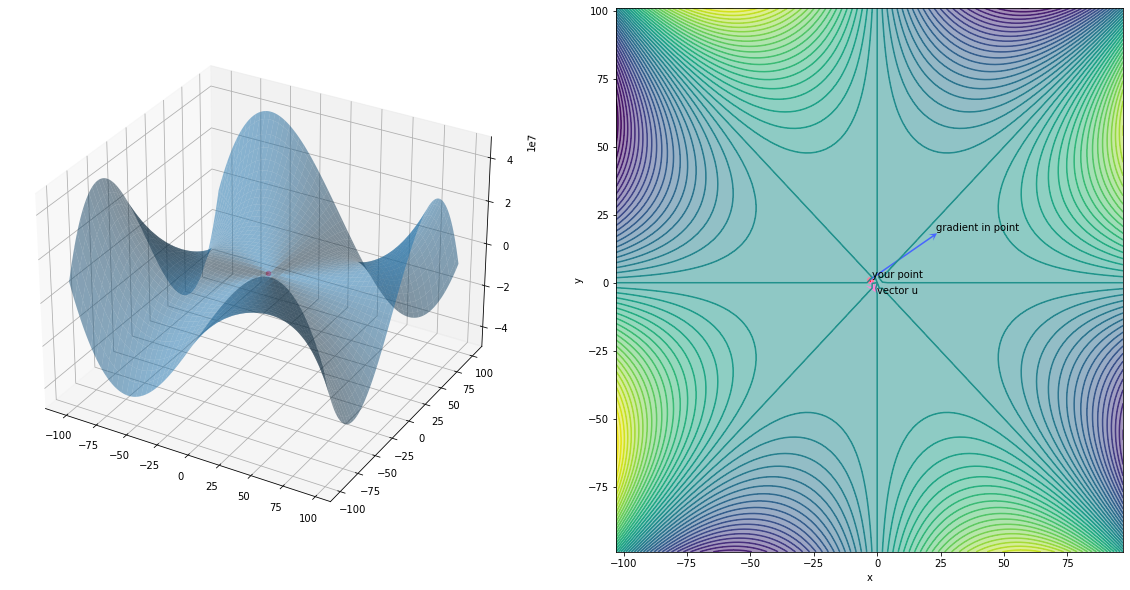

In [8]:
x1 = ask_numerical_input("Enter coordinates x1 from the point to be evaluated. Please, do not introduce fractions or text")
y1 = ask_numerical_input("Enter coordinates y1 from the point to be evaluated. Please, do not introduce fractions or text")
# x1 = -2
# y1 = 1
print('This is your point: ( {} , {} )'.format(x1, y1))

x = np.linspace(x1 - 100, x1 + 100, 100)
y = np.linspace(y1 - 100, y1 + 100, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

z1 = f(x1, y1)
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, alpha=.5)
ax1.scatter(x1, y1, z1, color='#ff7a99', alpha=1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X, Y, Z, 50)
ax2.contourf(X, Y, Z, 50, alpha=.5)
ax2.scatter(x1, y1, color='#ff7a99', alpha=1)
ax2.text(x1+1,y1+1, 'your point', fontsize=10)

# Gradient calculation
grad_f_x_y = gradient_function(x1, y1)
print('This is the result of applying the gradient: < {} , {} > \n'.format(grad_f_x_y[0], grad_f_x_y[1]))
ax2.quiver(x1, y1, grad_f_x_y[0], grad_f_x_y[1], width=0.003, headwidth=5, headaxislength=3, color='#4766ff', scale=1,
           scale_units='xy')
ax2.text(x1+grad_f_x_y[0],y1+grad_f_x_y[1], 'gradient in point', fontsize=10)


x_u = ask_numerical_input("Enter coordinates x_u from the vector u to be evaluated. Please, do not introduce fractions or text")
y_u = ask_numerical_input("Enter coordinates y_u from the vector u to be evaluated. Please, do not introduce fractions or text")
# x_u = -30
# y_u = -20.31
print('This is your vector u: < {} , {} >'.format(x_u, y_u))
ax2.quiver(x1, y1, x_u, y_u, width=0.005, headwidth=5, headaxislength=3, color='#ff87d7', scale=1, scale_units='xy')
ax2.text(x1+x_u,y1+y_u, 'vector u', fontsize=10)

u_n = normalize_vector(np.array([x_u, y_u]))
print("This is u' (normalized): < {} , {} >".format(u_n[0], u_n[1]))
ax2.quiver(x1, y1, u_n[0], u_n[1], width=0.003, headwidth=5, headaxislength=3, color='red', scale=1, scale_units='xy')

direct_dev = grad_f_x_y @ u_n
print(
    "The directional derivative of f(x,y) in ( {}, {} ) with the vector u < {}, {} > is: {}\n".format(x1, y1, x_u, y_u,
                                                                                                    direct_dev))
if direct_dev == 0 :
    print("The function doesn't change direction in that direction and point")
elif direct_dev > 0 :
    print("The function increases in that direction and point")
else:
    print("The function decreases in that direction and point")

ax2.set_xlabel('x')
ax2.set_ylabel('y');
